# Face recognition with SVM

Let's attempt face recognition with SVM, the goal of this exercise will be to classify pictures in the category representing the subject present in the picture.

0. Import usual libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Use ```sklearn.datasets``` to import ```fetch_lfw_people```

Include these in a DataFrame, set min_faces_per_person to 60, we need classes that are represented by enough observations.
The object you have imported contains several different objects, one of them is called DESCR, print it and read it, it will inform you on the data you are working with.

In [3]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=60)

In [16]:
print (lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [24]:
print(lfw_people.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


2. What are the different categories in the variable ```target_names```

In [21]:
for name in lfw_people.target_names:
        print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Junichiro Koizumi
Tony Blair


3. What is the ```shape``` of the variable images 

In [20]:
lfw_people.images.shape

(1348, 62, 47)

---> This is a three dimensional array , the first dimension represents the numberof images, the second and third respectively represent the width and height of the images in the dataset.

4. In matplotlib, you will find an ```imshow()``` method which lets you visualize images. Try and visualise an image in your dataset. Try adding the associated lable as xlabel.

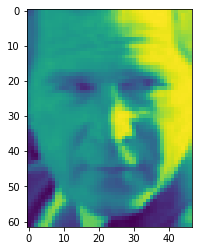

In [41]:
# show image
plt.imshow(lfw_people.images[7])

5. Display the first 15 images in the dataset, you can find help by following these links :

* [enumerate()](http://book.pythontips.com/en/latest/enumerate.html)
* [plt.subplots()](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
* [ax.flat](https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do)


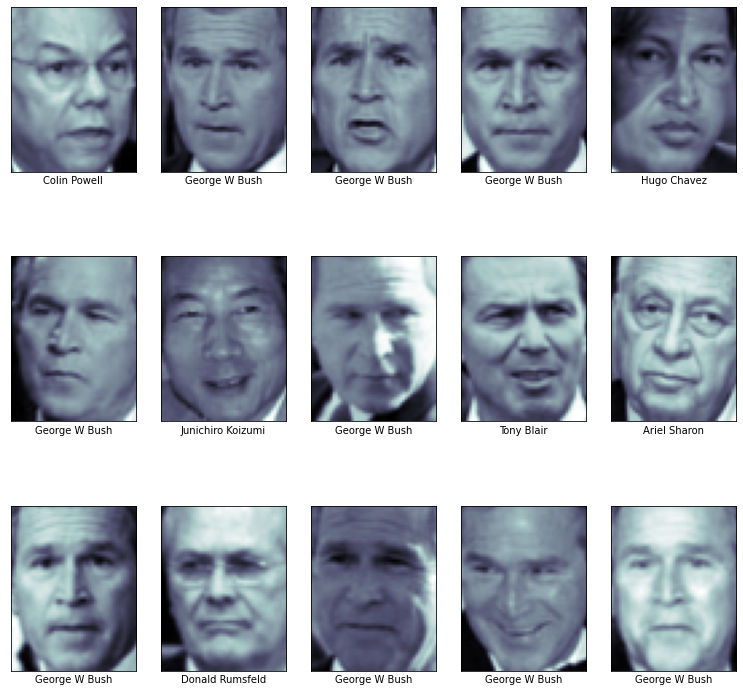

In [90]:
# show the first 15 images
plt.figure(figsize=(13,13))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(lfw_people.images[i], cmap=plt.cm.bone)
    plt.xlabel(lfw_people.target_names[lfw_people.target[i]])

    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.gca().axes.get_yaxis().set_visible(False)

5. Import ```SVC``` from ```sklearn.svm``` and define an instance of this model.

In [112]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', class_weight='balanced')

6. Split your data between a train and a test set, and normalize it.

In [122]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

7. Fit your model on your training data.

In [123]:
clf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced')

In [124]:
%time clf.fit(X_train_scaled, y_train)
print ("")
print(clf.score(X_test_scaled, y_test))

Wall time: 2.41 s

0.7851851851851852


8. Let's attempt to improve the score by finding the best set of hyper-parameters for this model. Use GridSearchCV to do so.

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.397 total time=   2.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.392 total time=   2.8s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.392 total time=   2.8s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.394 total time=   2.6s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.394 total time=   2.5s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.397 total time=   2.4s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.392 total time=   2.4s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.392 total time=   3.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.394 total time=   2.3s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.394 total time=   2.3s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.397 total time=   2.3s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished
Wall time: 1min 51s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [128]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001}


In [130]:
clf = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
clf.fit(X_train_scaled, y_train)
print(clf.score(X_test_scaled, y_test))

0.837037037037037


9. Look at your results in a confusion matrix, then use the classification_report function

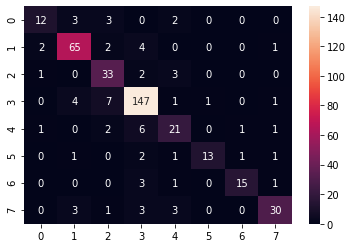

precision    recall  f1-score   support

     Ariel Sharon       0.75      0.60      0.67        20
     Colin Powell       0.86      0.88      0.87        74
  Donald Rumsfeld       0.69      0.85      0.76        39
    George W Bush       0.88      0.91      0.90       161
Gerhard Schroeder       0.66      0.66      0.66        32
      Hugo Chavez       0.93      0.68      0.79        19
Junichiro Koizumi       0.88      0.75      0.81        20
       Tony Blair       0.86      0.75      0.80        40

         accuracy                           0.83       405
        macro avg       0.81      0.76      0.78       405
     weighted avg       0.83      0.83      0.83       405



10. Let's try looking at a few images and the predictions the model makes on them. Like we did at the beginning of the exercise, display a collection of images with the corresponding predictions.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

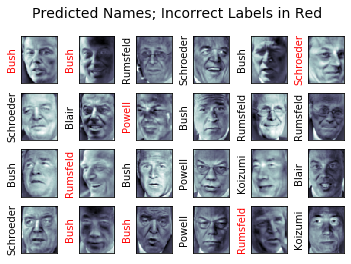

## Wanna go further? 

--> [Great Medium Article](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47) 